# Create an image classification solution with Tensorflow

opening first image: data_set/darth_vader/0014.jpeg


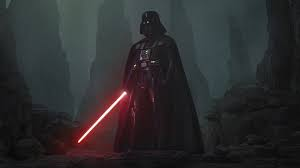

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import PIL
import tensorflow as tf

from tensorflow import keras
from keras import layers
from keras.models import Sequential

# Setup image folder
import pathlib

data_dir = pathlib.Path('data_set')
image_paths = list(data_dir.glob('*/*.jpeg'))
print('opening first image:', image_paths[0])
PIL.Image.open(str(image_paths[0]))

create a set for training the model

In [4]:
# Create a dataset, 
# the images will be resized automatically using the image_dataset_from_directory() utility
batch_size = 5
img_height = 180
img_width = 180

train_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 26 files belonging to 2 classes.
Using 21 files for training.


create a set for validating the model

In [5]:
val_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 26 files belonging to 2 classes.
Using 5 files for validation.


find the classnames used

In [6]:
class_names = train_ds.class_names
print(class_names)

['darth_vader', 'storm_trooper']


See what an image looks like as a tensor:
(it is an array of 180 pixels rows with 180 pixels each (from left to right), each pixel has an RBG color value of [0-255, 0-255, 0-255])

In [7]:
image0, class0 = list(train_ds)[0]
image0
#print(np.min(image0), np.max(image0))

<tf.Tensor: shape=(5, 180, 180, 3), dtype=float32, numpy=
array([[[[2.55000000e+02, 2.55000000e+02, 2.55000000e+02],
         [2.55000000e+02, 2.55000000e+02, 2.55000000e+02],
         [2.55000000e+02, 2.55000000e+02, 2.55000000e+02],
         ...,
         [2.55000000e+02, 2.55000000e+02, 2.55000000e+02],
         [2.55000000e+02, 2.55000000e+02, 2.55000000e+02],
         [2.55000000e+02, 2.55000000e+02, 2.55000000e+02]],

        [[2.55000000e+02, 2.55000000e+02, 2.55000000e+02],
         [2.55000000e+02, 2.55000000e+02, 2.55000000e+02],
         [2.55000000e+02, 2.55000000e+02, 2.55000000e+02],
         ...,
         [2.55000000e+02, 2.55000000e+02, 2.55000000e+02],
         [2.55000000e+02, 2.55000000e+02, 2.55000000e+02],
         [2.55000000e+02, 2.55000000e+02, 2.55000000e+02]],

        [[2.55000000e+02, 2.55000000e+02, 2.55000000e+02],
         [2.55000000e+02, 2.55000000e+02, 2.55000000e+02],
         [2.55000000e+02, 2.55000000e+02, 2.55000000e+02],
         ...,
         [2

Visualize/check the (resized) data using pyplot

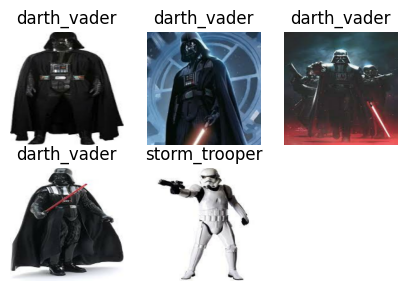

In [8]:
# configure plot
plt.figure(figsize=(5, 5))
for images, labels in train_ds.take(1): # take one batch of 5  
  for i in range(len(images)):
    ax = plt.subplot(3, 3, i + 1)
    imageArray = images[i].numpy().astype("uint8")    
    plt.imshow(imageArray)
    plt.title(class_names[labels[i]])
    plt.axis("off")
#show plot
plt.show()

manually iterate over the dataset and retrieve batches of images

In [9]:
for image_batch, labels_batch in train_ds:
  print(image_batch.shape)
  print(labels_batch.shape)
  break # stop after first iteration


(5, 180, 180, 3)
(5,)


The image_batch is a tensor of the shape (5, 180, 180, 3).

This is a batch of 5 images of shape 180x180x3 (the last dimension refers to color channels RGB). 

The label_batch is a tensor of the shape (5,), these are corresponding labels to the 5 images.

The RGB channel values are in the [0, 255] range.
This is not ideal for a neural network; in general you should seek to make your input values small (between 0 - 1).

In [10]:
normalization_layer = layers.Rescaling(1./255) # creates a funtion

normalized_ds = train_ds.map(lambda x, y: (normalization_layer(x), y))
image_batch, labels_batch = next(iter(normalized_ds)) #another way to get the first element of the iterable training set
first_image = image_batch[0]
print(first_image)
# Notice the pixel values are now in `[0,1]`.
print(np.min(first_image), np.max(first_image))


Instructions for updating:
Lambda fuctions will be no more assumed to be used in the statement where they are used, or at least in the same block. https://github.com/tensorflow/tensorflow/issues/56089
tf.Tensor(
[[[0.3019608  0.3019608  0.3019608 ]
  [0.3019608  0.3019608  0.3019608 ]
  [0.3019608  0.3019608  0.3019608 ]
  ...
  [0.30588236 0.30588236 0.30588236]
  [0.30588236 0.30588236 0.30588236]
  [0.3021024  0.3021024  0.3021024 ]]

 [[0.3019608  0.3019608  0.3019608 ]
  [0.3019608  0.3019608  0.3019608 ]
  [0.3019608  0.3019608  0.3019608 ]
  ...
  [0.30588236 0.30588236 0.30588236]
  [0.30588236 0.30588236 0.30588236]
  [0.3021024  0.3021024  0.3021024 ]]

 [[0.3019608  0.3019608  0.3019608 ]
  [0.3019608  0.3019608  0.3019608 ]
  [0.3019608  0.3019608  0.3019608 ]
  ...
  [0.30588236 0.30588236 0.30588236]
  [0.30588236 0.30588236 0.30588236]
  [0.3021024  0.3021024  0.3021024 ]]

 ...

 [[0.34117648 0.34117648 0.34117648]
  [0.3416013  0.3416013  0.3416013 ]
  [0.34509805 0.34

#### A basic (Keras) Sequential Model using keras (Convolution) Layers

<img src="../basics/.images/how_a_cnn_sees.png" width="400">


## Conv2D Layers

The filters are stacked in layers passing the output of one layer as input to the next layer. Each layer will hold less neurons (=convolution) than its previous layer reducing the images to there bear essence.

Filters can be visualized as pixels:
<img src="../basics/.images/filters.png" width="100">

Filters to make it easier for the computer to recognize features, for instance by finding and highlighting edges (vertical/horizontal lines).

After each filter the image becomes smaller:
<img src="../basics/.images/convolution.gif" width="400">

------------------------
*(Optional Examin the Conv2D layer this is a great learning opportunity!)*
*It is possible to see exactly what a Conv2D layer does:*
*By adding only one Conv2D layer to the model. Then run a prediction to see what the output is.*

*Because the model has only one layer the output is the output of the Conv2D layer which is an array of filtered images (as an array of pixels of course).*

<img src="../basics/.images/conv2d.png" width="400">

<img src="../basics/.images/features.jpg" width="400">

[watch video](https://pysource.com/2022/08/02/feature-map-computer-vision-with-keras-p-4/)

------------------------

## MaxPooling2D()

It is nothing but selecting maximum value from the matrix of specified size(default size is 2 X 2). This method is helpful to extract features with high importance or which are high-lighted in the image.

<img src="../basics/.images/maxpooling.gif" width="400">


## Flatten() and Dense()

Making the classification desision is done using the [Dense() layer](../basics/4_tensor_keras.ipynb#But-what-does-the-layers.Dense()-function-do?)
Finally when enough image filtering has been done, the result has to be flattened to a one dimensional array to serve as input for the Dense layer(s).

Think of flattening as taking all the rows of a multi dimensional array
 [[1,2],
  [2,3]] 
 and laying them out one after the other in one long row. Turning the array into a one dimensional array 
 [1,2,3,4...]


In [11]:
num_classes = len(class_names)

model = Sequential([
  # you could define the definitions of an input layer here but you don't have to
  layers.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  layers.Conv2D(16, 3, padding='same', activation='relu'), # 16 random '3x3 filters' result in 16 different features being recognized.
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(), #flattens from an 2d array of [180, 180] to 1d array [32400] as input for the dense layer
  layers.Dense(128, activation='relu'), # 128 = number of neurons in a network layer, that decide if an image matches
  layers.Dense(num_classes) # the last 2 Dense layers will transform the features into output labels
])

model.summary() # view summary of the model


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_1 (Rescaling)     (None, 180, 180, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 180, 180, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 90, 90, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 90, 90, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 45, 45, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 45, 45, 64)        1

#### Compile the model

Choose the *tf.keras.optimizers.Adam optimizer* and *tf.keras.losses.SparseCategoricalCrossentropy* loss function. To view training and validation accuracy for each training epoch, pass the metrics argument to Model.compile.

In [12]:
model.compile(
  optimizer='adam',
  loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
  metrics=['accuracy']) #monitor accuracy after each training epoch


#### Train

train the model by fitting the training data and testing the accuracy and then testing the accuracy using the validation data.

During the different of epochs (optimization runs) keep a close eay on the *increase* in accuracy:

In [13]:
# train the model with only 3! steps
model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=3,
  verbose=2
)

Epoch 1/3
5/5 - 2s - loss: 1.3091 - accuracy: 0.7143 - val_loss: 3.6750 - val_accuracy: 0.4000 - 2s/epoch - 328ms/step
Epoch 2/3
5/5 - 0s - loss: 1.9776 - accuracy: 0.5238 - val_loss: 0.5773 - val_accuracy: 0.6000 - 464ms/epoch - 93ms/step
Epoch 3/3
5/5 - 0s - loss: 0.5508 - accuracy: 0.6190 - val_loss: 0.5529 - val_accuracy: 0.8000 - 449ms/epoch - 90ms/step



### Visualize Training accurracy and Validation accuracy
To help you create better models make the training accuracy and validation accuracy visible in a plot.

Epoch 1/10
5/5 [==============================] - 0s 91ms/step - loss: 0.4453 - accuracy: 0.9524 - val_loss: 0.3896 - val_accuracy: 0.8000
Epoch 2/10
5/5 [==============================] - 1s 98ms/step - loss: 0.2656 - accuracy: 0.9524 - val_loss: 0.2825 - val_accuracy: 0.8000
Epoch 3/10
5/5 [==============================] - 0s 91ms/step - loss: 0.2115 - accuracy: 0.9048 - val_loss: 0.3678 - val_accuracy: 0.8000
Epoch 4/10
5/5 [==============================] - 0s 81ms/step - loss: 0.2067 - accuracy: 0.9048 - val_loss: 0.2457 - val_accuracy: 0.8000
Epoch 5/10
5/5 [==============================] - 0s 96ms/step - loss: 0.0889 - accuracy: 1.0000 - val_loss: 0.2123 - val_accuracy: 1.0000
Epoch 6/10
5/5 [==============================] - 0s 89ms/step - loss: 0.0506 - accuracy: 1.0000 - val_loss: 0.2605 - val_accuracy: 1.0000
Epoch 7/10
5/5 [==============================] - 0s 82ms/step - loss: 0.0509 - accuracy: 1.0000 - val_loss: 0.1310 - val_accuracy: 1.0000
Epoch 8/10
5/5 [===========

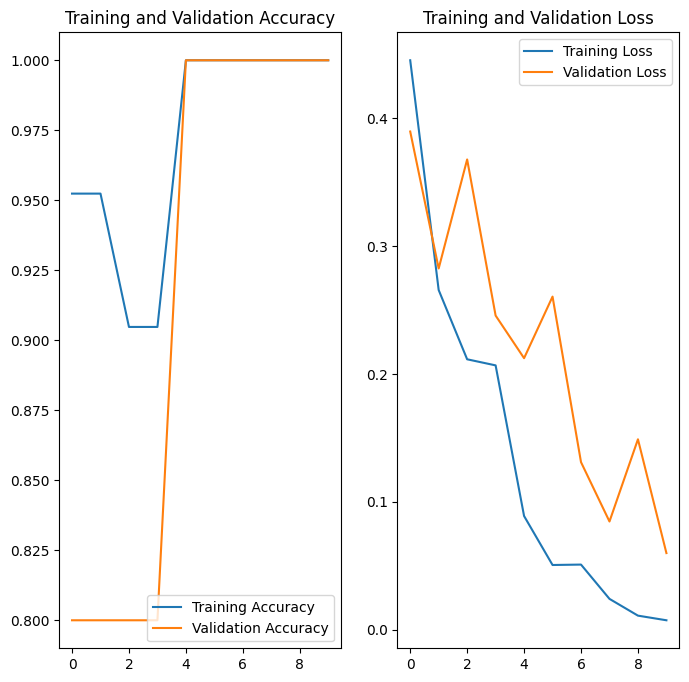

In [14]:
# now train it with an additional 10 steps
epochs = 10
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

#### Predict using data unknown to model

/root/.keras/datasets/unclassified.jpeg


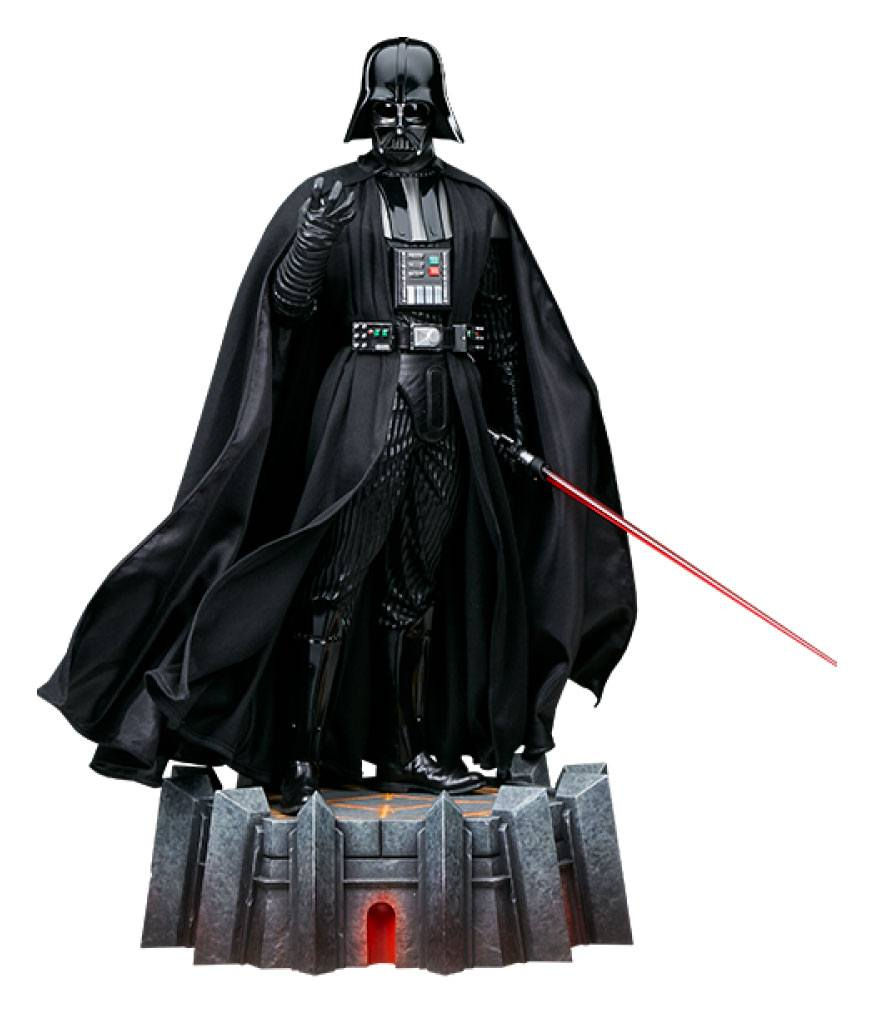

In [15]:
unclassified_image_url = "https://www.captain-hook.nl/controller/images/003394c0a45a936a58f44658e9fc05d2.jpg"
# save to keras cache
unclassified_image_path = tf.keras.utils.get_file('unclassified.jpeg', origin=unclassified_image_url)
print(unclassified_image_path)
PIL.Image.open(unclassified_image_path)

In [16]:
img = tf.keras.utils.load_img(
    unclassified_image_path, target_size=(img_height, img_width)
)

img_array = tf.keras.utils.img_to_array(img)
img_array = tf.expand_dims(img_array, 0) # Create a batch

predictions = model.predict(img_array)
score = tf.nn.softmax(predictions[0])

print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(class_names[np.argmax(score)], 100 * np.max(score))
)

1/1 [==============================] - 0s 97ms/step
This image most likely belongs to darth_vader with a 99.98 percent confidence.


#### Improving your model

##### Overfitting
If the accuracy it start to decline or stagnate (after peaking) it means there is overfitting: 
The training data starts to fit the model too perfectly! (When there are a small number of training examples, the model sometimes learns from noises or unwanted details from training examples) While the accuracy on the validation set is not improving. Not good: what you really want is to develop models that do well on a data set they haven't seen before.

To prevent overfitting, the best solution is to use more training data with examples of what you want to predict. The dataset should cover the full range of inputs that the model is expected to handle. Additional data may only be useful if it covers new and interesting cases.

Another way to prevent overfitting is by using **data augmentation**, in our example by supplying a flipped version of the images..

##### Underfitting
The opposite of overfitting is underfitting. Underfitting occurs when there is still room for improvement on the train data. This can happen for a number of reasons: If the model is not powerful enough, is over-regularized, or has simply not been trained long enough. This means the network has not learned the relevant patterns in the training data.

In [17]:
# Data augmentation takes the approach of generating additional training data from 
# your existing examples by augmenting them using random transformations that yield 
# believable-looking images. This helps expose the model to more aspects of the data 
# and generalize better.

tf.get_logger().setLevel('ERROR') # INFO, WARNING, DEBUG

model = Sequential([
# begin data augmentation
  layers.RandomFlip("horizontal",
                      input_shape=(img_height,
                                  img_width,
                                  3)),
  layers.RandomRotation(0.1),
  layers.RandomZoom(0.1),
# end data augmentation
  layers.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(1000, activation='relu'),
  layers.Dense(num_classes)
])

model.compile(
  optimizer='adam',
  loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
  metrics=['accuracy'])
  
# run previous step to train the model and visualize the plot again

##### Save the model to file

In [18]:
# save it to file
TF_MODEL_FILE_PATH = 'trooper-model'
model.save(TF_MODEL_FILE_PATH)

# load it from file
new_model = tf.keras.models.load_model(TF_MODEL_FILE_PATH)
new_model.summary()

import os
os.listdir(TF_MODEL_FILE_PATH)

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 random_flip (RandomFlip)    (None, 180, 180, 3)       0         
                                                                 
 random_rotation (RandomRota  (None, 180, 180, 3)      0         
 tion)                                                           
                                                                 
 random_zoom (RandomZoom)    (None, 180, 180, 3)       0         
                                                                 
 rescaling_2 (Rescaling)     (None, 180, 180, 3)       0         
                                                                 
 conv2d_3 (Conv2D)           (None, 180, 180, 16)      448       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 90, 90, 16)       0         
 2D)                                                  

['assets',
 'fingerprint.pb',
 'keras_metadata.pb',
 'saved_model.pb',
 'variables']